In [212]:
# loading libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import datasets
from datetime import date
import seaborn as sns
import pandas as pd
import numpy as np

### Loading Data

In [213]:
df=pd.read_csv(r"C:\Users\hp pavelion\Downloads\trainData.csv")
dft=pd.read_csv(r"C:\Users\hp pavelion\Downloads\testData.csv")
df.head()

,Description,Vendor_Name,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding,Number_of_Days_until_Payment
0,Milk x 7 ltrs,David Taylor,26-04-2011 11:50,26-Apr-11,26-May-11,672.78,672.78,0.0,13
1,Office Stationery,Stephen Wright MD,24-05-2011 09:40,24-May-11,23-Jun-11,5101.98,5101.98,0.0,38
2,Milk x 10 ltrs,Mark Cordova,24-05-2011 12:56,24-Mar-11,23-Apr-11,7422.78,7422.78,0.0,61
3,Annual Fee,Kimberly White,09-07-2011 10:42,10-May-11,24-May-11,11.98,11.98,0.0,62
4,NaN,Teresa Marshall,05-09-2011 20:55,05-Sep-11,06-Sep-11,5501.98,5501.98,0.0,2


### Observing Data for Finding Relations

<AxesSubplot:xlabel='Vendor_Name'>

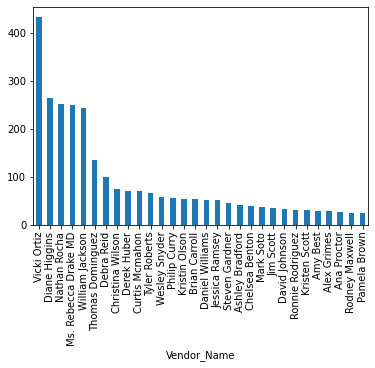

In [214]:
vis=df.groupby("Vendor_Name")["Vendor_Name"].count().sort_values(ascending=False).head(30)
vis.plot.bar()

<AxesSubplot:xlabel='Vendor_Name'>

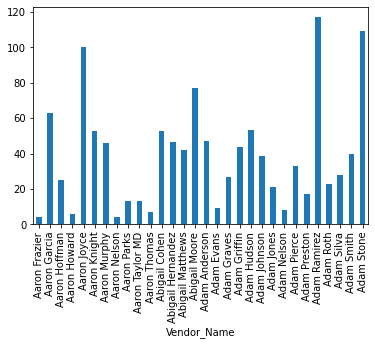

In [215]:
vis1=df.groupby("Vendor_Name")["Number_of_Days_until_Payment"].mean().head(30)
vis1.plot.bar()
# Some Vendors have more orders than others that shows the dataset depends on each VENDORS BEHAVIOUR.
# Some Vendors get money faster than others again showing each VENDORS BEHAVIOUR.

<AxesSubplot:xlabel='Description'>

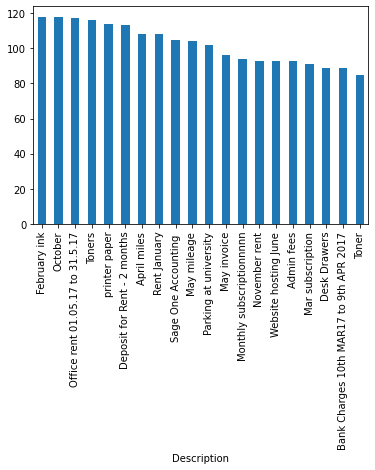

In [216]:
vis3=df.groupby(["Description"])["Number_of_Days_until_Payment"].mean().sort_values(ascending=False).head(20)
vis3.plot.bar()
# Some Description need more time to pay, which tells Description can decide days in which money is paid back

<AxesSubplot:xlabel='Description'>

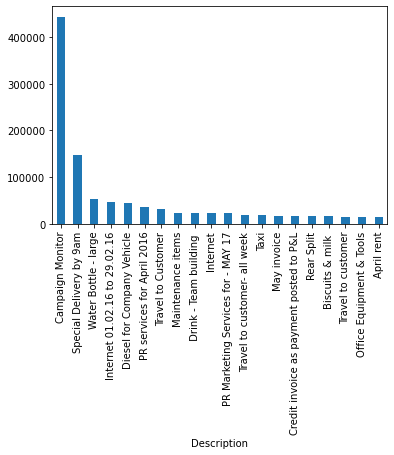

In [217]:
vis2=df.groupby(["Description"])["Amount"].mean().sort_values(ascending=False).head(20)
vis2.plot.bar()

### Encoding Features

In [218]:
# Serialing Description, identifying each item seperatly
dfdes=pd.concat([df["Description"], dft["Description"]], axis = 0) # Concating Train And Test Data(Description)
Des=dfdes.unique()
Des_Map={k:i for i,k in enumerate(Des,1)}
df["Description"]=df["Description"].map(Des_Map)
df["Description"].fillna(0)

0       1
1       2
2       3
3       4
4       5
       ..
8748    5
8749    5
8750    5
8751    5
8752    5
Name: Description, Length: 8753, dtype: int64

In [219]:
# Giving IDs to Vendors as they are performing indiviually as we saw from visualisation
dfven=pd.concat([df["Vendor_Name"], dft["Vendor_Name"]], axis = 0) # Concating Train And Test Data(Vendor_Name)
Ven=dfven.unique()
Ven_Map={k:i for i,k in enumerate(Ven,1)}
df["Vendor_Name"]=df["Vendor_Name"].map(Ven_Map)
df["Vendor_Name"]

0          1
1          2
2          3
3          4
4          5
        ... 
8748    3272
8749    3273
8750    3274
8751    3275
8752    3276
Name: Vendor_Name, Length: 8753, dtype: int64

In [220]:
# Encoding Entry Creation :
df["Created_Time"]=df["Created"].apply(lambda x: x.split(' ')[1])
df["Created_Date"]=df["Created"].apply(lambda x: x.split(' ')[0])
df["Created_Date_py"]=df["Created_Date"].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))
# Creation Week Day can spot linient week days, which led to late payment
df["Created_Week_Day"]=df["Created_Date_py"].dt.day_of_week
# Creation Time can tell vendor performance on that time of the day
df["Created_Time"]=df["Created_Time"].apply(lambda x: int(x.split(":")[0]))
# Creation Day: On which day of the month entry was created
df["Created_Day"]=df["Created_Date"].apply(lambda x: int(x.split("-")[0]))
# Creation Month: In which month try was made
df["Created_Month"]=df["Created_Date"].apply(lambda x: int(x.split("-")[1]))
# Creation Year: In which year try was made
df["Created_Year"]=df["Created_Date"].apply(lambda x: int(x.split("-")[2]))
df

,Description,Vendor_Name,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding,Number_of_Days_until_Payment,Created_Time,Created_Date,Created_Date_py,Created_Week_Day,Created_Day,Created_Month,Created_Year
0,1,1,26-04-2011 11:50,26-Apr-11,26-May-11,672.78,672.78,0.0,13,11,26-04-2011,2011-04-26,1,26,4,2011
1,2,2,24-05-2011 09:40,24-May-11,23-Jun-11,5101.98,5101.98,0.0,38,9,24-05-2011,2011-05-24,1,24,5,2011
2,3,3,24-05-2011 12:56,24-Mar-11,23-Apr-11,7422.78,7422.78,0.0,61,12,24-05-2011,2011-05-24,1,24,5,2011
3,4,4,09-07-2011 10:42,10-May-11,24-May-11,11.98,11.98,0.0,62,10,09-07-2011,2011-07-09,5,9,7,2011
4,5,5,05-09-2011 20:55,05-Sep-11,06-Sep-11,5501.98,5501.98,0.0,2,20,05-09-2011,2011-09-05,0,5,9,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,5,3272,31-10-2017 14:40,29-Sep-17,29-Oct-17,551.98,551.98,0.0,34,14,31-10-2017,2017-10-31,1,31,10,2017
8749,5,3273,31-10-2017 14:44,29-Sep-17,29-Oct-17,386.98,386.98,0.0,34,14,31-10-2017,2017-10-31,1,31,10,2017
8750,5,3274,31-10-2017 22:07,31-Oct-17,01-Nov-17,279.81,279.81,0.0,5,22,31-10-2017,2017-10-31,1,31,10,2017
8751,5,3275,02-11-2017 10:51,23-Oct-17,06-Nov-17,145.98,145.98,0.0,10,10,02-11-2017,2017-11-02,3,2,11,2017


In [221]:
# Days offered to pay the Amount
df["Invoice_Date_py"]=df["Invoice_Date"].apply(lambda x: datetime.strptime(x, '%d-%b-%y'))
df["Due_Date"]=df["Due_Date"].apply(lambda x: datetime.strptime(x, '%d-%b-%y'))
df["Days_to_Pay"]=df["Due_Date"]-df["Invoice_Date_py"]
df["Days_to_Pay"]=df['Days_to_Pay'].astype(str)
df["Days_to_Pay"]=df["Days_to_Pay"].apply(lambda x: int(x.split(" ")[0]))

In [222]:
# Days between Invoice and Creation
df["Diff_Invoice_Creat"]=df["Invoice_Date_py"]-df["Created_Date_py"]
df["Diff_Invoice_Creat"]=df["Diff_Invoice_Creat"].astype(str)
df["Diff_Invoice_Creat"]=df["Diff_Invoice_Creat"].apply(lambda x: int(x.split(" ")[0]))

In [223]:
# Invoice Making Encoding :
df["Invoice_Week_Day"]=df["Invoice_Date_py"].dt.day_of_week
df["Invoice_Day"]=df["Invoice_Date"].apply(lambda x: int(x.split("-")[0]))
df["Invoice_Date_py_str"]=df['Invoice_Date_py'].astype(str)
df["Invoice_Month"]=df["Invoice_Date_py_str"].apply(lambda x: int(x.split("-")[1]))
df["Invoice_Year"]=df["Invoice_Date_py_str"].apply(lambda x: int(x.split("-")[0]))

In [224]:
# Due Making Encoding :
df["Due_Week_Day"]=df["Due_Date"].dt.day_of_week
df["Due_Date_str"]=df['Due_Date'].astype(str)
df["Due_Month"]=df["Due_Date_str"].apply(lambda x: int(x.split("-")[1]))
df["Due_Day"]=df["Due_Date_str"].apply(lambda x: int(x.split("-")[2]))
df["Due_Year"]=df["Due_Date_str"].apply(lambda x: int(x.split("-")[0]))

In [225]:
# Year Encoding of Due, Create,Invoice :
Year=df["Due_Year"].unique()
Year=(sorted(Year))
Year_Map={k:i for i,k in enumerate(Year,1)}
df["Due_Year"]=df["Due_Year"].map(Year_Map)
df["Invoice_Year"]=df["Invoice_Year"].map(Year_Map)
df["Created_Year"]=df["Created_Year"].map(Year_Map)

In [226]:
col=['Description','Vendor_Name','Amount', 'Settled', 'Outstanding',
       'Created_Time', 'Days_to_Pay', 'Created_Day',
       'Created_Month', 'Created_Year', 'Invoice_Day', 'Invoice_Month',
       'Invoice_Year', 'Due_Month', 'Due_Day', 'Due_Year','Invoice_Week_Day','Due_Week_Day','Created_Week_Day','Diff_Invoice_Creat', 'Number_of_Days_until_Payment']
# col=['Description','Vendor_Name','Amount', 'Settled', 'Outstanding',
#        'Created_Time', 'Days_to_Pay', 'Created_Day',
#        'Created_Month', 'Created_Year', 'Invoice_Day', 'Invoice_Month',
#        'Invoice_Year', 'Due_Month', 'Due_Day', 'Due_Year','Diff_Invoice_Creat', 'Number_of_Days_until_Payment']

In [227]:
df=df[col]

In [228]:
df.dtypes

Description                       int64
Vendor_Name                       int64
Amount                          float64
Settled                         float64
Outstanding                     float64
Created_Time                      int64
Days_to_Pay                       int64
Created_Day                       int64
Created_Month                     int64
Created_Year                      int64
Invoice_Day                       int64
Invoice_Month                     int64
Invoice_Year                      int64
Due_Month                         int64
Due_Day                           int64
Due_Year                          int64
Invoice_Week_Day                  int64
Due_Week_Day                      int64
Created_Week_Day                  int64
Diff_Invoice_Creat                int64
Number_of_Days_until_Payment      int64
dtype: object

### Checking Co-Relation

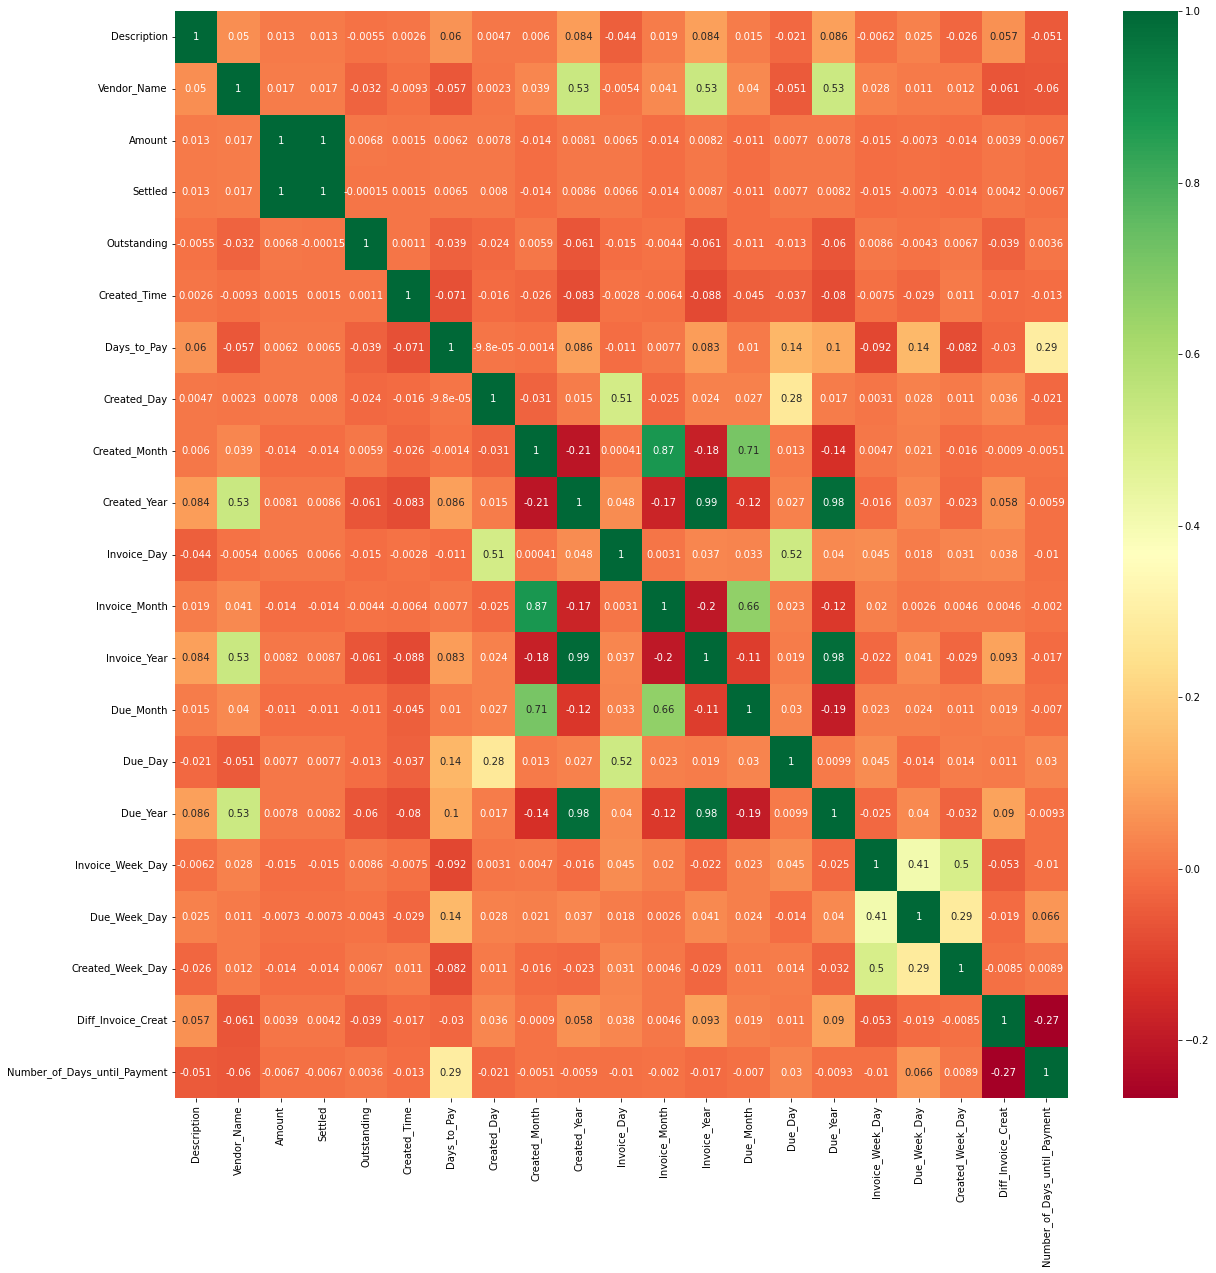

In [229]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [230]:
df

,Description,Vendor_Name,Amount,Settled,Outstanding,Created_Time,Days_to_Pay,Created_Day,Created_Month,Created_Year,...,Invoice_Month,Invoice_Year,Due_Month,Due_Day,Due_Year,Invoice_Week_Day,Due_Week_Day,Created_Week_Day,Diff_Invoice_Creat,Number_of_Days_until_Payment
0,1,1,672.78,672.78,0.0,11,30,26,4,1,...,4,1,5,26,1,1,3,1,0,13
1,2,2,5101.98,5101.98,0.0,9,30,24,5,1,...,5,1,6,23,1,1,3,1,0,38
2,3,3,7422.78,7422.78,0.0,12,30,24,5,1,...,3,1,4,23,1,3,5,1,-61,61
3,4,4,11.98,11.98,0.0,10,14,9,7,1,...,5,1,5,24,1,1,1,5,-60,62
4,5,5,5501.98,5501.98,0.0,20,1,5,9,1,...,9,1,9,6,1,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,5,3272,551.98,551.98,0.0,14,30,31,10,7,...,9,7,10,29,7,4,6,1,-32,34
8749,5,3273,386.98,386.98,0.0,14,30,31,10,7,...,9,7,10,29,7,4,6,1,-32,34
8750,5,3274,279.81,279.81,0.0,22,1,31,10,7,...,10,7,11,1,7,1,2,1,0,5
8751,5,3275,145.98,145.98,0.0,10,14,2,11,7,...,10,7,11,6,7,0,0,3,-10,10


### Model Training 

In [231]:
SEED = 1
X, y = df.loc[:, df.columns != 'Number_of_Days_until_Payment'], df.iloc[:,-1:]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = SEED)
gbr = GradientBoostingRegressor(n_estimators = 1000, random_state = SEED)
gbr.fit(train_X, train_y)
pred_y = gbr.predict(test_X)
test_rmse = MSE(test_y, pred_y) ** (1 / 2)
print('RMSE test set: {:.2f}'.format(test_rmse))
# print(np.mean(cross_val_score(gbr, train_X, train_y, cv=5))) #KCROSS VALIDATION

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


RMSE test set: 23.13


In [232]:
from sklearn.ensemble import RandomForestClassifier
X, y = df.loc[:, df.columns != 'Number_of_Days_until_Payment'], df.iloc[:,-1:]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 10)
clf = RandomForestClassifier(n_estimators = 150) 
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)
test_rmse = MSE(test_y, y_pred) ** (1 / 2)
print('RMSE test set: {:.2f}'.format(test_rmse))

C:\Users\HPPAVE~1\AppData\Local\Temp/ipykernel_3140/1503758242.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_X, train_y)


RMSE test set: 30.01


In [233]:
# Gradient Boosting Regressor works better for our dataset 

### Encoding Test Data 


In [234]:
# Test Data
dft=pd.read_csv(r"C:\Users\hp pavelion\Downloads\testData.csv")
dft.head()

,Description,Vendor_Name,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding
0,Annual Fee,Aaron Hoffman,26-11-2015 12:38,30-Nov-15,30-Dec-15,11.98,11.98,0.0
1,NaN,Aaron Murphy,27-10-2016 10:35,06-Sep-16,06-Oct-16,56.98,56.98,0.0
2,NaN,Aaron Parks,29-02-2016 00:53,29-Feb-16,14-Mar-16,61.98,61.98,0.0
3,NaN,Aaron Thomas,27-08-2013 18:46,23-Aug-13,06-Sep-13,674.30,674.30,0.0
4,NaN,Abigail Hernandez,16-05-2017 16:48,10-May-17,09-Jun-17,302.94,302.94,0.0


In [235]:
# Mapping Description with previously made map, which was made by concating train and test data(Description).
dft["Description"]=dft["Description"].map(Des_Map)
dft["Description"].fillna(0)

0       4
1       5
2       5
3       5
4       5
       ..
1120    5
1121    5
1122    5
1123    5
1124    5
Name: Description, Length: 1125, dtype: int64

In [236]:
# Mapping VendorName with previously made map, which was made by concating train and test data(Vendor_Name).
dft["Vendor_Name"]=dft["Vendor_Name"].map(Ven_Map)
dft["Vendor_Name"]

0       1966
1       1581
2       1890
3        151
4       2761
        ... 
1120    2825
1121     815
1122     575
1123    1737
1124    2217
Name: Vendor_Name, Length: 1125, dtype: int64

In [237]:
dft["Created_Date_t"]=dft["Created"].apply(lambda x: x.split(' ')[0])
dft["Created_Date_t"]=dft["Created_Date_t"].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))
dft["Created_Week_Day"]=dft["Created_Date_t"].dt.day_of_week
dft["Created_Time"]=dft["Created"].apply(lambda x: int((x.split(" ")[1])[:2]))
dft["Created_Day"]=dft["Created"].apply(lambda x: int((x.split(" ")[0])[:2]))
dft["Created_Month"]=dft["Created"].apply(lambda x: int((x.split(" ")[0])[3:5]))
dft["Created_Year"]=dft["Created"].apply(lambda x: int((x.split(" ")[0])[6:]))

In [238]:
dft["Invoice_Date"]=dft["Invoice_Date"].apply(lambda x: datetime.strptime(x, '%d-%b-%y'))
dft["Due_Date"]=dft["Due_Date"].apply(lambda x: datetime.strptime(x, '%d-%b-%y'))
dft["Diff_Invoice_Creat"]=dft["Invoice_Date"]-dft["Created_Date_t"]
dft["Diff_Invoice_Creat"]=dft["Diff_Invoice_Creat"].astype(str)
dft["Diff_Invoice_Creat"]=dft["Diff_Invoice_Creat"].apply(lambda x: int(x.split(" ")[0]))

In [239]:
dft["Days_to_Pay"]=(dft["Due_Date"]-dft["Invoice_Date"]).astype(str)
dft["Days_to_Pay"]=dft["Days_to_Pay"].apply(lambda x: int(x.split(" ")[0]))

In [240]:
dft["Due_Week_Day"]=dft["Due_Date"].dt.day_of_week
dft["Due_Date"]=dft["Due_Date"].astype(str)
dft["Due_Day"]=dft["Due_Date"].apply(lambda x: int(x.split("-")[2]))
dft["Due_Month"]=dft["Due_Date"].apply(lambda x: int(x.split("-")[1]))
dft["Due_Year"]=dft["Due_Date"].apply(lambda x: int(x.split("-")[0]))

In [241]:
dft["Invoice_Week_Day"]=dft["Invoice_Date"].dt.day_of_week
dft["Invoice_Date"]=dft["Invoice_Date"].astype(str)
dft["Invoice_Day"]=dft["Invoice_Date"].apply(lambda x: int(x.split("-")[2]))
dft["Invoice_Month"]=dft["Invoice_Date"].apply(lambda x: int(x.split("-")[1]))
dft["Invoice_Year"]=dft["Invoice_Date"].apply(lambda x: int(x.split("-")[0]))

In [242]:
dft.dtypes

Description                    int64
Vendor_Name                    int64
Created                       object
Invoice_Date                  object
Due_Date                      object
Amount                       float64
Settled                      float64
Outstanding                  float64
Created_Date_t        datetime64[ns]
Created_Week_Day               int64
Created_Time                   int64
Created_Day                    int64
Created_Month                  int64
Created_Year                   int64
Diff_Invoice_Creat             int64
Days_to_Pay                    int64
Due_Week_Day                   int64
Due_Day                        int64
Due_Month                      int64
Due_Year                       int64
Invoice_Week_Day               int64
Invoice_Day                    int64
Invoice_Month                  int64
Invoice_Year                   int64
dtype: object

In [243]:
Year=dft["Due_Year"].unique()
Year=(sorted(Year))
Year_Map={k:i for i,k in enumerate(Year,1)}
dft["Due_Year"]=dft["Due_Year"].map(Year_Map)
dft["Invoice_Year"]=dft["Invoice_Year"].map(Year_Map)
dft["Created_Year"]=dft["Created_Year"].map(Year_Map)

In [244]:
col=['Description','Vendor_Name','Amount', 'Settled', 'Outstanding',
       'Created_Time', 'Days_to_Pay', 'Created_Day',
       'Created_Month', 'Created_Year', 'Invoice_Day', 'Invoice_Month',
       'Invoice_Year', 'Due_Month', 'Due_Day', 'Due_Year','Invoice_Week_Day','Due_Week_Day','Created_Week_Day','Diff_Invoice_Creat']

In [245]:
dft=dft[col]
dft

,Description,Vendor_Name,Amount,Settled,Outstanding,Created_Time,Days_to_Pay,Created_Day,Created_Month,Created_Year,Invoice_Day,Invoice_Month,Invoice_Year,Due_Month,Due_Day,Due_Year,Invoice_Week_Day,Due_Week_Day,Created_Week_Day,Diff_Invoice_Creat
0,4,1966,11.98,11.98,0.0,12,30,26,11,5,30,11,5,12,30,5,0,2,3,4
1,5,1581,56.98,56.98,0.0,10,30,27,10,6,6,9,6,10,6,6,1,3,3,-51
2,5,1890,61.98,61.98,0.0,0,14,29,2,6,29,2,6,3,14,6,0,0,0,0
3,5,151,674.30,674.30,0.0,18,14,27,8,3,23,8,3,9,6,3,4,4,1,-4
4,5,2761,302.94,302.94,0.0,16,30,16,5,7,10,5,7,6,9,7,2,4,1,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,5,2825,4201.98,4201.98,0.0,13,14,31,8,6,29,8,6,9,12,6,0,0,2,-2
1121,5,815,93.18,93.18,0.0,10,7,28,7,4,28,7,4,8,4,4,0,0,0,0
1122,5,575,1255.98,1255.98,0.0,10,4,5,9,7,2,9,7,9,6,7,5,2,1,-3
1123,5,1737,678.78,58.38,620.4,13,30,2,1,5,2,1,5,2,1,5,4,6,4,0


### Predicting the Results

In [246]:
pred_y = gbr.predict(dft.iloc[:,:])
pred_y

array([15.54266507, 56.54154789, 68.54360222, ..., 29.45981505,
       47.68744223, 44.42307747])

### Preparing the CSV

In [247]:
dft=pd.read_csv(r"C:\Users\hp pavelion\Downloads\testData.csv")
result= pd.DataFrame(pred_y,columns=["Number_of_Days_until_Payment"],index=None)
result["Vendor_Name"]=dft["Vendor_Name"]
col=["Vendor_Name","Number_of_Days_until_Payment"]
result=result[col]
result

,Vendor_Name,Number_of_Days_until_Payment
0,Aaron Hoffman,15.542665
1,Aaron Murphy,56.541548
2,Aaron Parks,68.543602
3,Aaron Thomas,39.041979
4,Abigail Hernandez,34.395668
...,...,...
1120,Zachary Coleman,29.098702
1121,Zachary Dudley,10.261368
1122,Zachary Hernandez,29.459815
1123,Zachary Simmons,47.687442


In [248]:
result.to_csv(r"C:\Users\hp pavelion\Downloads\Result_550-9.csv",index=False)